<pre style='font-size : 25px; text-align : center '><b>ASSIGNMENT 2</b></pre>
<pre style='font-size : 20px;'><b>PREDICTING HOUSING PRICES WITH POLYNOMIAL REGRESSION</b></pre>
<pre style='font-size : 15px'>Today we will continue working with boston housing data. Recap from the previous lesson that we managed to train the <i>linear regression</i> classifier on two features and as the result obtained mse score of 44 on train and 38 on test data. This time we will use <i>linear regression</i> on all the features and visualize the correlation between them and our target value. We will also try using <i>polynomial regression</i> to solve the problem. Finnaly, we will compare the results with the one from the previous assignment. </pre>
 
<i>Note : that's a test version of a notebook</i>

<pre style='font-size : 20px'><b>PART 1</b></pre>
<pre style='font-size : 18px'><b>Visualizing correlations</b></pre>
<pre style='font-size : 15px;'>First let's import necessary packages. </pre>

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as  plt 
import seaborn as sns

In [2]:
#just for conviniece we will set a grid background of figures using seaborn
sns.set()

<pre style='font-size : 15px'>Now it's time to load our dataset, that we already stored in files/ folder</pre>

In [3]:
#you can use ! charcter before expressions to perform basic linux commands
#expected to see boston_data.csv as output, if you don't see this, please run first assignment ones again 
! ls ../files/

boston_data.csv


In [4]:
df = pd.read_csv('../files/boston_data.csv')

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
correlation  = df.corr()

In [7]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<pre style='font-size : 15px'>Let's see only the correlation between target and features</pre>

In [8]:
correlation['target'].sort_values(ascending=False)[1:]

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

<pre style='font-size :15px'>Some features have positive correlation with our target, meaning that when the feature increases/dicreases - the target tends to also increase/dicrease, while others have negative correlation which implies that when the feature decreases/increases - target behaves the opposite. Now let's plot the correlation matrix to better understand it. </pre>

In [9]:
#uncomment to see the docs of the function
#?scatter_matrix

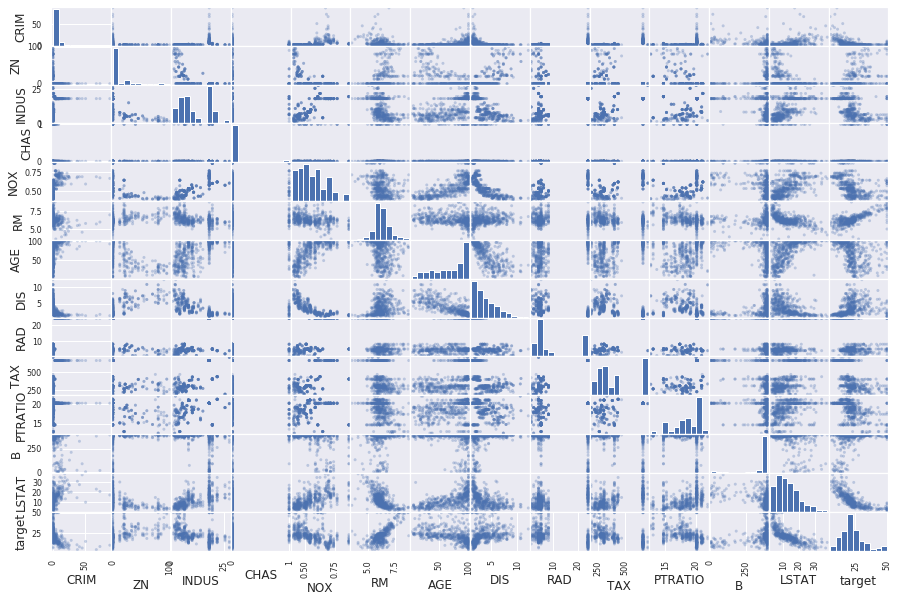

In [10]:
scatter_matrix(df, figsize=(15,10), alpha=0.3);
plt.plot();

<pre style='font-size :15px'>Let's also plot the dependecy between the target value and the feature with the biggest negative correlation score.</pre>

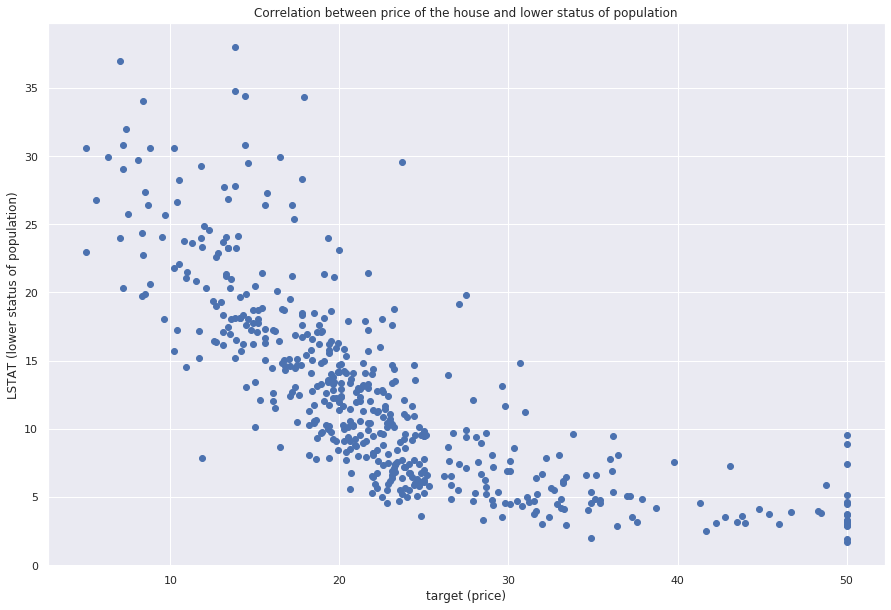

In [11]:
plt.figure(figsize=(15,10))
plt.scatter(df['target'],df['LSTAT'])
plt.xlabel('target (price)')
plt.ylabel('LSTAT (lower status of population)');
plt.title('Correlation between price of the house and lower status of population');

<pre style='font-size :15px'>From the chart above it's obvious why the correlation between LSTAT and target is the negative one.</pre>

<pre style='font-size : 20px'><b>PART 2</b></pre>
<pre style='font-size : 18px'><b>Using linear regression on all the features</b></pre>
<pre style='font-size : 15px;'>First let's import necessary packages. </pre>

In [12]:
#you can see some warning messages below, but don't worry they won't effect your code
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
train_columns = list(df.columns)

In [14]:
target_column = train_columns.pop(-1)

In [15]:
train_columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [16]:
target_column

'target'

In [17]:
#we will set a random seed for the same results
seed = 5

In [39]:
train_set, test_set = train_test_split(df,test_size=0.20, random_state=seed)

In [40]:
X_train, y_train, X_test, y_test = train_set[train_columns], train_set[target_column],\
test_set[train_columns], test_set[target_column]

<pre style='font_size : 15px'>It's time to create, train and evaluate our classifier</pre>

In [41]:
clf = LinearRegression()

In [42]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_predicted_train = clf.predict(X_train)

In [44]:
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 22.477090408387635


In [45]:
y_predicted_test = clf.predict(X_test)

In [46]:
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on test data : 20.869292183770575


<pre style='font-size : 15px'>Using all the features we got much better results. One thing to notice is that the mse score on train data is lower then on test one which is the sign of <i>overfitting</i> about which we will speak more concrete in the next lab, but for now let's move on with this one.</pre>

<pre style='font-size : 20px'><b>PART 3</b></pre>
<pre style='font-size : 18px'><b>Using polynomial regression on all the features</b></pre>

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
clf = LinearRegression()

In [49]:
train_set, test_set = train_test_split(df,test_size=0.25, random_state=seed)

In [50]:
X_train, y_train, X_test, y_test = train_set[train_columns], train_set[target_column],\
test_set[train_columns], test_set[target_column]

<pre style='font-size : 15px'>To use polynomial regression we firstly need to process them via PolynomialFeatures class</pre>

In [51]:
#C- degree of polynom. Feel free to play around with number and see the perfomance of the model depending on it
C = 2

In [52]:
poly = PolynomialFeatures(C)

In [53]:
poly_features_train = poly.fit_transform(X_train)

In [54]:
clf.fit(poly_features_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
poly_features_test = poly.transform(X_test)

In [56]:
y_predicted_train = clf.predict(poly_features_train)

In [57]:
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 15.509037866432015


In [58]:
y_predicted_test = clf.predict(poly_features_test)

In [59]:
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on test data : 42.12635302013469


<pre style='font-size : 15px'>Using polynomial regression with degree of 2 we got much better results on  the train data, but our algorithm failed on the test one, which is a signal of overfitting. In the next lesson we will try to fix this situation using <i>regularization</i>.</pre>